<a href="https://colab.research.google.com/github/gongx030/etv2_pioneer/blob/master/Etv2_ChIP_seq_peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare the overlap of Etv2 ChIP-seq peaks
by Wuming Gong



In [13]:
start_time0 <- Sys.time()

## Install R packages

In [14]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'GenomicRanges', 'VennDiagram'
), Ncpus = 2)

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'GenomicRanges', 'VennDiagram'

Old packages: 'htmlwidgets', 'readr', 'foreign'



In [15]:
library(GenomicRanges)
library(VennDiagram)

## Read a combined Etv2 ChIP-seq peak set

In [16]:
all_etv2_peaks_url <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/all_Etv2_peaks.rds'
gr <- readRDS(gzcon(url(all_etv2_peaks_url)))
gr
colnames(gr$group)

GRanges object with 162010 ranges and 4 metadata columns:
           seqnames            ranges strand |
              <Rle>         <IRanges>  <Rle> |
       [1]     chr1   3037784-3037983      * |
       [2]     chr1   3263790-3263989      * |
       [3]     chr1   3344682-3344881      * |
       [4]     chr1   3460640-3460839      * |
       [5]     chr1   3490314-3490513      * |
       ...      ...               ...    ... .
  [162006]     chrY 90828936-90829135      * |
  [162007]     chrY 90836259-90836458      * |
  [162008]     chrY 90841624-90841823      * |
  [162009]     chrY 90842563-90842762      * |
  [162010]     chrY 90843810-90844009      * |
                                                                                                                 peak_id
                                                                                                             <character>
       [1]      /panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=2

[1] "MEF_Dox_d1_Etv2" "MEF_Dox_d2_Etv2" "MEF_Dox_d7_Etv2" "EB_Dox_3h_Etv2" 
[5] "EB_Dox_12h_Etv2"

In [17]:
n_MEF_peaks <- sum(gr$group[, 'MEF_Dox_d1_Etv2'] | gr$group[, 'MEF_Dox_d2_Etv2'] | gr$group[, 'MEF_Dox_d7_Etv2'])
cat(sprintf('total number of Etv2 peaks in MEF: %d\n', n_MEF_peaks))
n_EB_peaks <- sum(gr$group[, 'EB_Dox_3h_Etv2'] | gr$group[, 'EB_Dox_12h_Etv2'])
cat(sprintf('total number of Etv2 peaks in MEF: %d\n', n_EB_peaks))
cat(sprintf('day 1 peaks in all MEF peaks: %%%.3f\n', 100 * sum(gr$group[, 'MEF_Dox_d1_Etv2']) / n_MEF_peaks))
cat(sprintf('3h peaks in all EB peaks: %%%.3f\n', 100 * sum(gr$group[, 'EB_Dox_3h_Etv2']) / n_EB_peaks))

total number of Etv2 peaks in MEF: 154468
total number of Etv2 peaks in MEF: 19651
day 1 peaks in all MEF peaks: %79.846
3h peaks in all EB peaks: %82.922


(polygon[GRID.polygon.26], polygon[GRID.polygon.27], polygon[GRID.polygon.28], polygon[GRID.polygon.29], polygon[GRID.polygon.30], polygon[GRID.polygon.31], text[GRID.text.32], text[GRID.text.33], text[GRID.text.34], text[GRID.text.35], text[GRID.text.36], text[GRID.text.37], text[GRID.text.38], text[GRID.text.39], text[GRID.text.40], text[GRID.text.41]) 

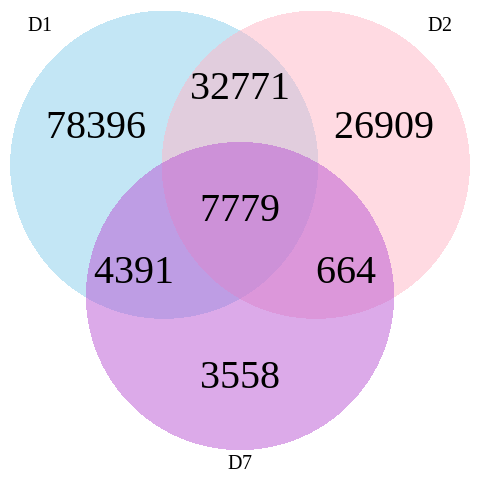

In [18]:
options(repr.plot.width=4, repr.plot.height=4)
draw.triple.venn(
  area1 = sum(gr$group[, 'MEF_Dox_d1_Etv2']),
  area2 = sum(gr$group[, 'MEF_Dox_d2_Etv2']), 
  area3 = sum(gr$group[, 'MEF_Dox_d7_Etv2']), 
  n12 = sum(gr$group[, 'MEF_Dox_d1_Etv2'] & gr$group[, 'MEF_Dox_d2_Etv2']), 
  n23 = sum(gr$group[, 'MEF_Dox_d2_Etv2'] & gr$group[, 'MEF_Dox_d7_Etv2']), 
  n13 = sum(gr$group[, 'MEF_Dox_d1_Etv2'] & gr$group[, 'MEF_Dox_d7_Etv2']), 
  n123 = sum(gr$group[, 'MEF_Dox_d1_Etv2'] & gr$group[, 'MEF_Dox_d2_Etv2'] & gr$group[, 'MEF_Dox_d7_Etv2']),
  category = c("D1", "D2", "D7"), 
  lty = "blank", 
  fill = c("skyblue", "pink1", "mediumorchid"),
  cex = 2,
  cat.cex = 1
)

(polygon[GRID.polygon.42], polygon[GRID.polygon.43], polygon[GRID.polygon.44], polygon[GRID.polygon.45], text[GRID.text.46], text[GRID.text.47], text[GRID.text.48], text[GRID.text.49], text[GRID.text.50]) 

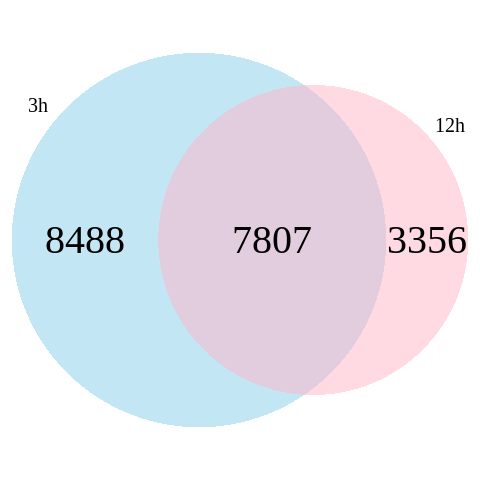

In [19]:
options(repr.plot.width=4, repr.plot.height=4)
draw.pairwise.venn(
  area1 = sum(gr$group[, 'EB_Dox_3h_Etv2']),
  area2 = sum(gr$group[, 'EB_Dox_12h_Etv2']), 
  cross.area = sum(gr$group[, 'EB_Dox_3h_Etv2'] & gr$group[, 'EB_Dox_12h_Etv2']), 
  category = c("3h", '12h'), 
  lty = "blank", 
  fill = c("skyblue", "pink1"),
  cex = 2,
  cat.cex = 1
)

In [20]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
[1] VennDiagram_1.6.20   futile.logger_1.4.3  GenomicRanges_1.40.0
[4] GenomeInfoDb_1.24.2  IRanges_2.22.2       S4Vectors_0.26.1    
[7] BiocGenerics_0.34.0 

loaded via a namespace (and not attached):
 [1] XVector_0.28.0         zli

In [21]:
Sys.time() - start_time0

Time difference of 21.32674 secs